[0.00905535 0.01041181 0.00248148]
0.1516
0.0472
0.7971
0.009055353573631365
0.010411807187117638
0.002481475436326714
[0.99800055 0.97810306 0.95814622 0.94803249 0.92263903 0.91527317
 0.11943664 0.28972195 0.40392724 0.5159037  0.5859198  0.6147136
 0.68904489 0.74241177 0.78088278 0.84753404 0.87765658 0.90007498]
[359.2 358.2 357.5]


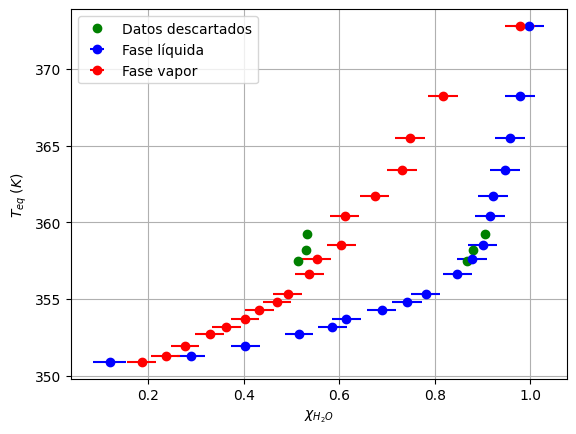

In [230]:
import numpy as np
import matplotlib.pyplot as plt
from math import *

#Obtención de x(rho)

T_eb = np.array([99.8,95.2,92.5,90.4,88.7,87.4,77.9,78.3,78.9,79.7,80.2,80.7,81.3,81.8,82.3,83.6,84.6,85.5])

#Polinomio rho(x) con los datos de densidades

datos = np.array([[1, 0.9893],
                [0.96478161, 0.9798],
                [0.92669448, 0.9658],
                [0.88293874, 0.9504],
                [0.83353817, 0.9368],
                [0.77922168, 0.9186],
                [0.70041125, 0.8975],
                [0.60528538, 0.8731],
                [0.49240047, 0.8539],
                [0.360986815, 0.8347],
                [0.275000616, 0.8237],
                [0.187412531, 0.8102],
                [0.09623431, 0.8028]])

datos = datos.T

pol_rho, inc_pol_rho = np.polyfit(datos[0],datos[1],2,cov=True,full=False)

inc_pol_rho = np.sqrt(np.diag(inc_pol_rho))

print(inc_pol_rho)

a = 0.1516
b = 0.0472
c = 0.7971

print(a)
print(b)
print(c)

sa = inc_pol_rho[0]
sb = inc_pol_rho[1]
sc = inc_pol_rho[2]

print(sa)
print(sb)
print(sc)


#Cálculo de x(rho)

def x_rho(rho):
    x1 = (-b + np.sqrt(b**2 - 4*a*(c-rho)))/(2*a) 
    x2 = (-b - np.sqrt(b**2 - 4*a*(c-rho)))/(2*a)
    return x1

rho_vap= np.array([0.9885, 0.9371, 0.9174, 0.9128, 0.8978, 0.8826,0.8112, 0.8168, 0.8218, 0.829, 0.8344, 0.8407, 0.846, 0.8527, 0.8571, 0.8663, 0.8695,0.881])

rho_liq = np.array([0.9952, 0.9883, 0.9815, 0.9781, 0.9697, 0.9673,0.8049, 0.8235, 0.8409, 0.8618, 0.8768, 0.8834, 0.9016, 0.9157, 0.9264, 0.946, 0.9553, 0.9624])

curva_liq = x_rho(rho_liq)
curva_vap = x_rho(rho_vap)

print(curva_liq)

#Gráfica con los datos descartados

T_desc = np.array([86.2,85.2,84.5])
print(T_desc+273)

rho_vap_desc = np.array([0.8653,0.8649,0.8614])

rho_liq_desc = np.array([0.9643,0.9563,0.9519])

liq_desc = x_rho(rho_liq_desc)
vap_desc = x_rho(rho_vap_desc)

#Cálculo de las fraccciones y sus incertidumbres

s_rho = 0.0001

def s_chi(rho):
    k = np.sqrt(b**2 - 4*a*(c-rho))
    s_chi = np.sqrt(((b-k)/(2*a**2) + 2*(rho-c)/(k*a))**2 * sa**2 + (b/(2*k*a) - 1/(2*a))**2 * sb**2 + (sc/k)**2 + (s_rho/k)**2)
    return s_chi


s_chi_liq = s_chi(rho_liq)
s_chi_vap = s_chi(rho_vap)

#plt.plot(curva_liq,T_eb + 273,'o',color='blue',label='Fase líquida')
#plt.plot(curva_vap,T_eb+273,'o',color='red',label='Fase vapor')

plt.errorbar(curva_liq,T_eb + 273,xerr=s_chi_liq,marker='o',linestyle='None',color='blue',label='Fase líquida')
plt.errorbar(curva_vap,T_eb+273,marker='o',linestyle='None',xerr=s_chi_vap,color='red',label='Fase vapor')

plt.plot(liq_desc,T_desc+273,'o',color='green')
plt.plot(vap_desc,T_desc+273,'o',color='green',label='Datos descartados')
plt.legend(loc='upper left')
plt.xlabel(r'$\chi_{H_2O}$')
plt.ylabel(r'$T_{eq} \;(K)$')
plt.grid(True)

In [231]:
def regresionSimple(x,y):
    """Axusta os datos dos vectore x e y a unha resta dada pola ec. y=a + bx
    Parametros:
    x vector con medidas da magnitud x
    y vector con medidas da magnitud y
    Devolve:
    a coeficiente a
    b coeficiente b
    sa incerteza de a
    sb incerteza de b
    r coeficiente de regresion lineal """
    n=len(x)
    sx=sum(x); sy=sum(y); xx=np.dot(x,x); yy=np.dot(y,y); xy=np.dot(x,y);
    denom=(n*xx - sx**2)
    b=(n*xy - sx*sy)/denom
    a=(xx*sy - sx*xy)/denom
    s=sqrt(sum((y-a-b*x)**2)/(n-2))
    sa=s*sqrt(xx/(n*xx-sx**2))
    sb=s*sqrt(n/(n*xx-sx**2))
    r=(n*xy-sx*sy)/sqrt((n*xx-sx**2)*(n*yy-sy**2))
    return [a,b, sa, sb, r, s]

[ 23.72391208   2.09705451 349.27817281]
[3.61422551 4.12429577 1.0825265 ]
Los valores de los parametros a ajustar son [3.54187843e+02 4.79606080e-05 1.28872633e+01 1.81113663e+00]
Las incertidumbres son: [3.35044783e-01 3.38682149e-05 7.07033106e-01 3.18445372e-01]
[3.54187843e+02 4.79606080e-05 1.28872633e+01 1.81113663e+00]
[3.35044783e-01 3.38682149e-05 7.07033106e-01 3.18445372e-01]


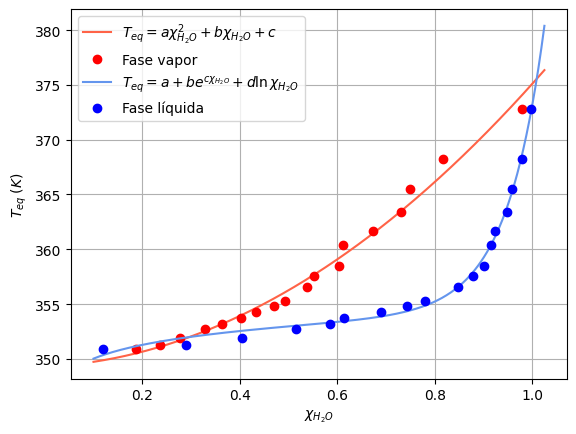

In [232]:
#Curva de la fase vapor, ajuste a un polinomio de grado 2

#Datos definitivos

ajuste_vapor,inc_vapor = np.polyfit(curva_vap,T_eb+273,2,full=False,cov=True) 

x = np.linspace(0.1,1.025,300)

print(ajuste_vapor)
print(np.sqrt(np.diag(inc_vapor)))

#Ajuste del liquido

import scipy.optimize as so

def ajuste(fun,par,x,y):
    sol = so.curve_fit(fun,x,y,p0=(par)) #Array de soluciones y incertidumbres
    valores = sol[0]
    inc = np.sqrt(np.diag(sol[1]))
    print(f'Los valores de los parametros a ajustar son {valores}')
    print(f'Las incertidumbres son: {inc}')
    return [valores,inc]

def exp(x,a,b,c,d):
    y = a +b*e**(c*x) + d*np.log(x)
    return y 

par = [355,0.0005,10,1]

ajuste_liquido,inc_liquido = ajuste(exp,par,curva_liq,T_eb+273)

print(ajuste_liquido)
print(inc_liquido)

y_x = ajuste_liquido[0] + ajuste_liquido[1]*e**(ajuste_liquido[2]*x) + ajuste_liquido[3]*np.log(x)


plt.plot(x,np.polyval(ajuste_vapor,x), color='tomato', label=r'$T_{eq} = a\chi_{H_2O}^2 + b \chi_{H_2O} + c$')
plt.plot(curva_vap,T_eb+273,'o',color='red',label='Fase vapor ')
plt.plot(x,y_x,color='cornflowerblue',label=r'$T_{eq} = a + be^{c\chi_{H_2O}} + d \ln \chi_{H_2O}$')
plt.plot(curva_liq,T_eb+273,'o',color='blue',label='Fase líquida')
plt.legend(loc='upper left')
plt.xlabel(r'$\chi_{H_2O}$')
plt.ylabel(r'$T_{eq} \;(K)$')
plt.grid(True)


Los valores de los parametros a ajustar son [1.48241322e+00 1.06711582e-03 8.05205464e+00 2.70286157e-01]
Las incertidumbres son: [0.19487868 0.00127088 1.17099645 0.15266545]
Los valores de los parametros a ajustar son [ 0.72592181  0.28965591 -0.01017096]
Las incertidumbres son: [0.03589725 0.02784224 0.00954496]
[ 0.72592181  0.28965591 -0.01017096]
[0.03589725 0.02784224 0.00954496]


C:\Users\gbast\AppData\Local\Temp\ipykernel_6020\3615395188.py:65: RuntimeWarning: divide by zero encountered in log
  y_gamma_oh = ajuste_gamma_oh[0] + ajuste_gamma_oh[1]*e**(ajuste_gamma_oh[2]*x) + ajuste_gamma_oh[3]*np.log(x)


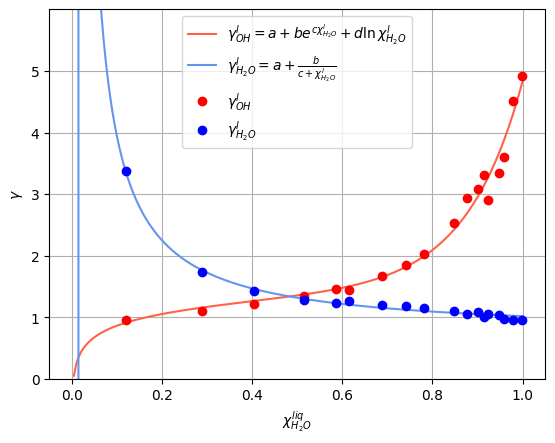

In [238]:
### Coeficientes de actividad

def gamma(chi_v,chi_l,p0,s_chi_v,s_chi_l,s_p0):
    p = 101325 #P0 en pascales
    gamma_l = (chi_v*p)/(chi_l*p0)
    s_gamma_l = p/(chi_l*p0) * np.sqrt(s_chi_v**2 + (chi_v*s_chi_l/chi_l)**2 + (chi_v*s_p0/p0)**2)
    return [gamma_l,s_gamma_l]

#Datos que vamos a emplear, solo las temperaturas que tengan valores de chi_l y chi_v

chi_liq_oh = 1 - curva_liq
chi_vap_oh = 1 - curva_vap

#Incertidumbres de chi, igual para chi_oh y chi_agua

s_chi_liq_coef = s_chi(rho_liq)
s_chi_vap_coef = s_chi(rho_vap)

#Presiones de vapor

R = 8.314
sT = 0.1

def p(l_v,a,s_l_v,s_a,T):
    p = a * np.exp(-l_v/(R*T))
    s_p = np.exp(-l_v/(R*T)) * np.sqrt(s_a**2 + (a*s_l_v/(R*T))**2 + (a*l_v*sT/(R*T**2))**2)
    return [p,s_p]


l_oh = 40474
s_l_oh = 96
l_agua = 39712
s_l_agua = 69
a_oh = 1.03 * 10**(11)
s_a_oh = 0.031 * 10**(11)
a_agua = 3.825 * 10**(10)
s_a_agua = 0.077 * 10 **(10)

x = np.linspace(0,1,200)

"""l_oh = 4769.1*8.314
s_l_oh = 96
l_agua = 4905.7*8.314
s_l_agua = 69
a_oh = 803700
s_a_oh = 0.031 * 10**(11)
a_agua = 528500
s_a_agua = 0.077 * 10 **(10)"""

p0_oh,inc_p0_oh = p(l_oh,a_oh,s_l_oh,s_a_oh,T_eb+273)
p0_agua,inc_p0_agua = p(l_agua,a_agua,s_l_agua,s_a_agua,T_eb+273)

#Cálculo de los coeficientes de actividad

gamma_oh,inc_gamma_oh = gamma(chi_vap_oh,chi_liq_oh,p0_oh,s_chi_vap_coef,s_chi_liq_coef,inc_p0_oh)

gamma_agua,inc_gamma_agua = gamma(curva_vap,curva_liq,p0_agua,s_chi_vap_coef,s_chi_liq_coef,inc_p0_agua)

#Ajustes de los coeficientes

par_gamma_oh = [1,1.47,-1,-0.5]

ajuste_gamma_oh, inc_ajuste_gamma_oh = ajuste(exp,par_gamma_oh,curva_liq,gamma_oh)

y_gamma_oh = ajuste_gamma_oh[0] + ajuste_gamma_oh[1]*e**(ajuste_gamma_oh[2]*x) + ajuste_gamma_oh[3]*np.log(x)

def y_gamma_agua_ajuste(x,a,b,c):
    gamma = a + b/(x+c)
    return gamma

par_gamma_agua = [0.1,1,0.3]

ajuste_gamma_agua, inc_ajuste_gamma_agua = ajuste(y_gamma_agua_ajuste,par_gamma_agua,curva_liq,gamma_agua)

print(ajuste_gamma_agua)
print(inc_ajuste_gamma_agua)

y_gamma_agua = ajuste_gamma_agua[0] + ajuste_gamma_agua[1]/(ajuste_gamma_agua[2] + x)

plt.plot(x,y_gamma_oh,color='tomato',label=r'$\gamma_{OH}^l = a + b e^{c\chi_{H_2O}^l} + d\ln \chi_{H_2O}^l$')
plt.plot(x,y_gamma_agua,color='cornflowerblue',label=r'$\gamma_{H_2O}^l = a + \frac{b}{c+\chi_{H_2O}^l}$')

plt.plot(curva_liq,gamma_oh,'o',color='red',label=r'$\gamma_{OH}^l$')
plt.plot(curva_liq,gamma_agua,'o',color='blue',label=r'$\gamma_{H_2O}^l$')



"""plt.errorbar(curva_liq,gamma_oh,yerr=inc_gamma_oh,marker='o',linestyle='None',color='red',label=r'$\gamma_{OH}^l$')
plt.errorbar(curva_liq,gamma_agua,yerr=inc_gamma_agua,marker='o',linestyle='None',color='blue',label=r'$\gamma_{H_2O}^l$')"""

plt.ylim(0, 6)
plt.yticks(range(0,6, 1))
plt.xlabel(r'$\chi_{H_2O}^{liq}$')
plt.ylabel(r'$\gamma$')
plt.legend(loc='upper center')
plt.grid(True)


[-4.59320686  9.01980934 -6.49158433  2.12693822 -0.10435725]
[0.89597022 2.05796561 1.62265433 0.50002463 0.04716201]


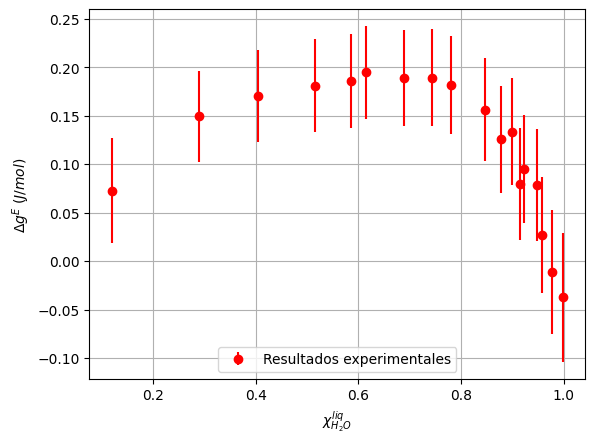

In [234]:
## Entalpía libre de exceso

def entalp(chi_agua,gamma_agua,chi_oh,gamma_oh,T,s_chi_agua,s_gamma_agua,s_chi_oh,s_gamma_oh):
    g = R*T*(chi_agua*np.log(gamma_agua) + chi_oh*np.log(gamma_oh))
    inc_g = R*T *np.sqrt((chi_agua*np.log(gamma_agua) + chi_oh*np.log(gamma_oh))**2 * (sT/T)**2 + (np.log(gamma_agua)*s_chi_agua)**2 + (np.log(gamma_oh)*s_chi_oh)**2 + (chi_agua*s_gamma_agua/gamma_agua)**2 + (chi_oh*s_gamma_oh/gamma_oh)**2)
    return [g,inc_g]

g, inc_g = entalp(curva_liq,gamma_agua,chi_liq_oh,gamma_oh,T_eb,s_chi_liq_coef,inc_gamma_agua,s_chi_liq_coef,inc_gamma_oh)

#Ajuste de la entalpía libre de exceso

xg = np.linspace(0.1,1,200)

g_ajuste, inc_g_ajuste = np.polyfit(curva_liq,g/1000,4,cov=True,full=False)

print(g_ajuste)
print(np.sqrt(np.diag(inc_g_ajuste)))

"""plt.plot(xg,np.polyval(g_ajuste,xg),color='black',label=r'$a\chi_{H_2O}^4 + b\chi_{H_2O}^3 + c\chi_{H_2O}^2 + d\chi_{H_2O} + e$')
plt.plot(curva_liq,g/1000,'o',color='red',label='Resultados experimentales')"""

plt.errorbar(curva_liq,g/1000,yerr=inc_g/1000,marker='o',linestyle='None',color='red',label='Resultados experimentales')

plt.xlabel(r'$\chi_{H_2O}^{liq}$')
plt.ylabel(r'$\Delta g^{E}\;(J/mol)$')
plt.legend(loc='lower center')
plt.grid(True)




[0.9887149804042324, -0.9538635546216598, 0.00934737020681633, 0.012156856081149263, -0.9987030760316379, 0.012900345668442698]
[ 12.97820134 -25.66493915  17.30676607  -3.96063741   0.33155696]
[2.31816279 5.3246182  4.19832806 1.29372437 0.12202327]
Los valores de los parametros a ajustar son [1.51353800e-01 4.87584249e-03 5.08331910e+00]
Las incertidumbres son: [0.03853568 0.0040363  0.81892392]
[ 12.54925469 -25.01912324  16.95809424  -4.77259888   1.28766951]
[2.04400664 4.69490537 3.70181526 1.14072282 0.10759226]


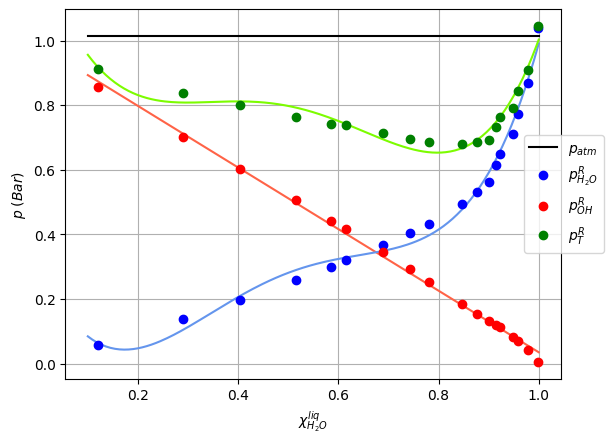

In [235]:
#Presiones de Raoult

def raoult(chi,p0,s_chi,s_p0):
    pr = chi*p0
    s_pr = np.sqrt((p0 * s_chi)**2 + (chi*s_p0)**2)
    return [pr,s_pr]

raoult_agua,inc_r_agua = raoult(curva_liq,p0_agua,s_chi_liq_coef,inc_p0_agua)
raoult_oh,inc_r_oh = raoult(chi_liq_oh,p0_oh,s_chi_liq_coef,inc_p0_oh)

raoult_t = raoult_agua + raoult_oh
inc_raoult_t = np.sqrt(inc_r_agua**2 + inc_r_oh**2)

xr = np.linspace(0.1,1,200)

p_atm = []

for i in range(len(xr)):
    p_atm.append(1.01325*10**5)

#Ajustes para las presiones
    
#Etanol, regresión lineal
    
p_r_oh = regresionSimple(curva_liq,raoult_oh/10**5)

print(p_r_oh)

#Agua, ajuste polinómico

p_r_agua, inc_p_r_agua = np.polyfit(curva_liq,raoult_agua/10**5,4,cov=True, full=False)

print(p_r_agua)
print(np.sqrt(np.diag(inc_p_r_agua)))

#Probamos un ajuste exponecial

def exp_p(x,a,b,c):
    y = a + b*e**(c*x) 
    return y

par_p = [0.1,1,1]

p_r_agua_2,inc_p_r_agua2 = ajuste(exp_p,par_p,curva_liq,raoult_agua/10**5)

yr = p_r_agua_2[0] + p_r_agua_2[1] * np.exp(p_r_agua_2[2]*xr)

#Presión total, ajuste polinómico

p_r_t, inc_p_r_t = np.polyfit(curva_liq,raoult_t/10**5,4,cov=True,full=False)

print(p_r_t)
print(np.sqrt(np.diag(inc_p_r_t)))

plt.plot(xr, p_r_oh[0] + p_r_oh[1]*xr,color='tomato')
plt.plot(xr,np.polyval(p_r_agua,xr),color='cornflowerblue')
#plt.plot(xr,yr)
plt.plot(xr,np.polyval(p_r_t,xr),color='lawngreen')


plt.plot(xr,np.array(p_atm)/(10**5),color='black',label=r'$p_{atm}$')
plt.plot(curva_liq,raoult_agua/10**5,'o',color='blue',label=r'$p^R_{H_2O}$')
plt.plot(curva_liq,raoult_oh/10**5,'o',color='red',label=r'$p^R_{OH}$')
plt.plot(curva_liq,raoult_t/10**5,'o',color='green',label=r'$p^R_T$')

plt.xlabel(r'$\chi_{H_2O}^{liq}$')
plt.ylabel(r'$p \; (Bar)$')
plt.grid(True)
plt.legend(loc='center right',bbox_to_anchor=(1.1, 0.5))

In [236]:
# Array con todos los datos

import pandas as pd

datos = np.array([T_eb+273,rho_vap,curva_vap,s_chi_vap,chi_vap_oh,rho_liq,curva_liq,s_chi_liq,chi_liq_oh,p0_agua,inc_p0_agua,p0_oh,inc_p0_oh,gamma_agua,inc_gamma_agua,gamma_oh,inc_gamma_oh,g,inc_g,raoult_agua,inc_r_agua,raoult_oh,inc_r_oh,raoult_t,inc_raoult_t])

df = pd.DataFrame(datos)

df.to_excel('anexo_datos.xlsx', index=False, header=False)

print(datos)

[[ 3.72800000e+02  3.68200000e+02  3.65500000e+02  3.63400000e+02
   3.61700000e+02  3.60400000e+02  3.50900000e+02  3.51300000e+02
   3.51900000e+02  3.52700000e+02  3.53200000e+02  3.53700000e+02
   3.54300000e+02  3.54800000e+02  3.55300000e+02  3.56600000e+02
   3.57600000e+02  3.58500000e+02]
 [ 9.88500000e-01  9.37100000e-01  9.17400000e-01  9.12800000e-01
   8.97800000e-01  8.82600000e-01  8.11200000e-01  8.16800000e-01
   8.21800000e-01  8.29000000e-01  8.34400000e-01  8.40700000e-01
   8.46000000e-01  8.52700000e-01  8.57100000e-01  8.66300000e-01
   8.69500000e-01  8.81000000e-01]
 [ 9.78684708e-01  8.17834690e-01  7.48633346e-01  7.31697810e-01
   6.74075361e-01  6.11281019e-01  1.86733286e-01  2.36986390e-01
   2.76950324e-01  3.28740421e-01  3.64208167e-01  4.02747245e-01
   4.33218843e-01  4.69618025e-01  4.92410807e-01  5.37651349e-01
   5.52710256e-01  6.04369351e-01]
 [ 3.15320177e-02  3.10491661e-02  3.08134182e-02  3.07531609e-02
   3.05411260e-02  3.02998434e-02  3.